Nesta célula importamos as bibliotecas necessárias para classificação.
Usamos pandas e numpy para manipulação dos dados; matplotlib e seaborn para visualização;
e os modelos do scikit-learn para treinar e avaliar classificadores.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

sns.set(style="whitegrid")


Aqui carregamos o dataset de classificação (Heart Disease), que contém informações clínicas de pacientes.
O objetivo é prever se o paciente possui doença cardíaca (1) ou não (0).

In [21]:
df = pd.read_csv("../data/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Nesta etapa examinamos informações gerais do conjunto de dados, como tipos de variáveis, estatísticas básicas e possíveis valores faltantes.

In [22]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Aqui geramos a matriz de correlação para identificar relações entre as variáveis de entrada e a variável alvo target.

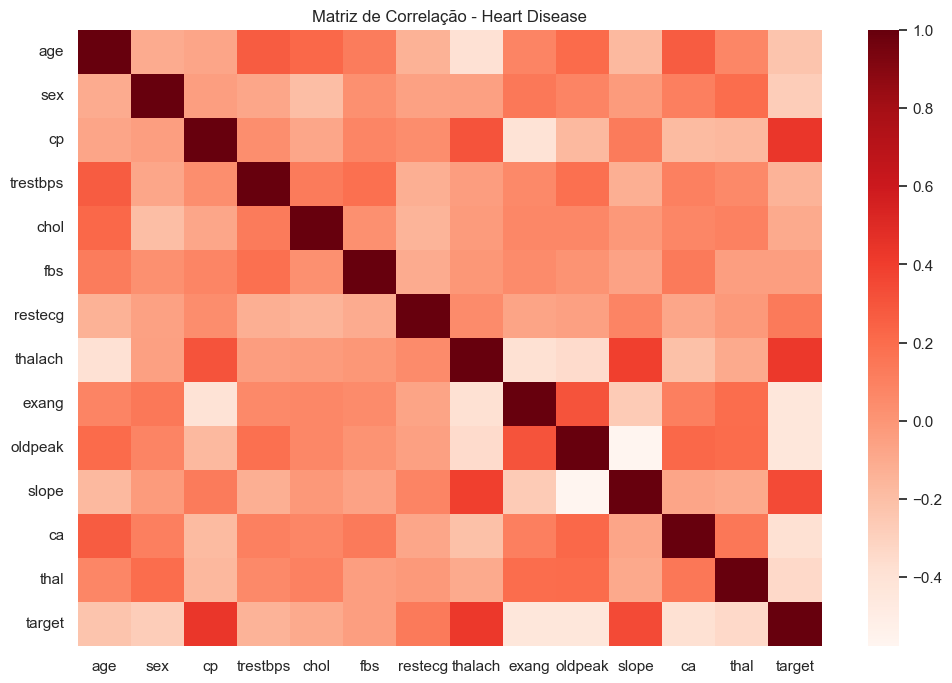

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="Reds")
plt.title("Matriz de Correlação - Heart Disease")
plt.show()

A seguir separamos as variáveis de entrada e a variável alvo (target).
Em seguida normalizamos os dados utilizando StandardScaler, necessário para SVM e MLP.

In [24]:
X = df.drop("target", axis=1)
y = df["target"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Dividimos o dataset em dados de treino (80%) e teste (20%), garantindo avaliação justa dos modelos.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

A Regressão Logística é um modelo linear usado para classificação binária.
Avaliamos acurácia, precisão, recall, F1-score e matriz de confusão.

Regressão Logística
Acurácia: 0.7951219512195122
Precisão: 0.7563025210084033
Recall: 0.8737864077669902
F1-Score: 0.8108108108108109


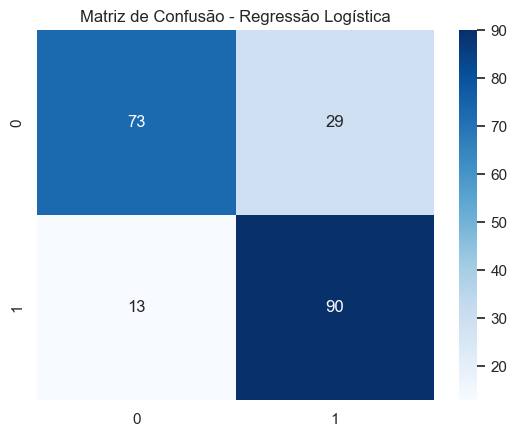

In [26]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

pred_lr = logreg.predict(X_test)

acc_lr = accuracy_score(y_test, pred_lr)
prec_lr = precision_score(y_test, pred_lr)
rec_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)

print("Regressão Logística")
print("Acurácia:", acc_lr)
print("Precisão:", prec_lr)
print("Recall:", rec_lr)
print("F1-Score:", f1_lr)

sns.heatmap(confusion_matrix(y_test, pred_lr), annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusão - Regressão Logística")
plt.show()


A Árvore de Decisão aprende padrões por meio de divisões sequenciais dos dados.
Pode sofrer overfitting dependendo da profundidade.

Árvore de Decisão


Acurácia: 0.9853658536585366
Precisão: 1.0
Recall: 0.970873786407767
F1-Score: 0.9852216748768473


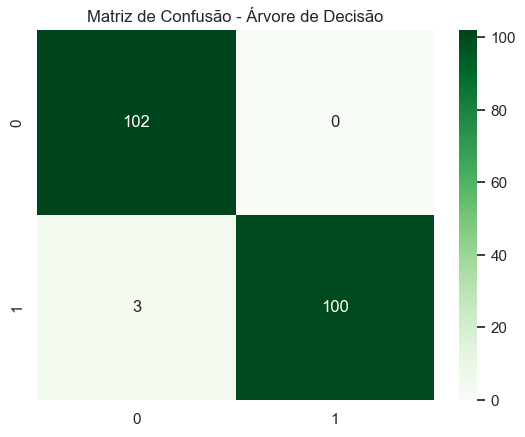

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, pred_dt)
prec_dt = precision_score(y_test, pred_dt)
rec_dt = recall_score(y_test, pred_dt)
f1_dt = f1_score(y_test, pred_dt)

print("Árvore de Decisão")
print("Acurácia:", acc_dt)
print("Precisão:", prec_dt)
print("Recall:", rec_dt)
print("F1-Score:", f1_dt)

sns.heatmap(confusion_matrix(y_test, pred_dt), annot=True, cmap="Greens", fmt="d")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.show()


O SVM busca uma fronteira ótima entre as classes.
Geralmente apresenta ótimo desempenho após normalização.

SVM
Acurácia: 0.8878048780487805
Precisão: 0.8508771929824561
Recall: 0.941747572815534
F1-Score: 0.8940092165898618


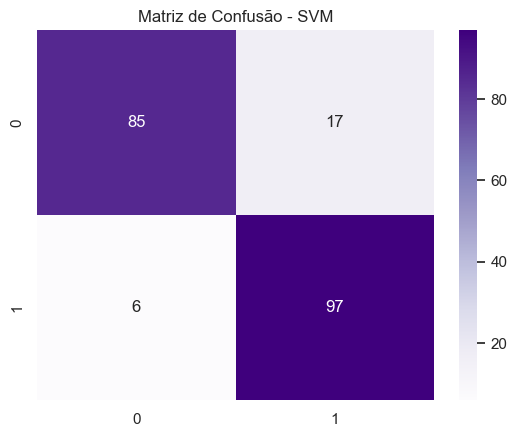

In [28]:
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

pred_svm = svm.predict(X_test)

acc_svm = accuracy_score(y_test, pred_svm)
prec_svm = precision_score(y_test, pred_svm)
rec_svm = recall_score(y_test, pred_svm)
f1_svm = f1_score(y_test, pred_svm)

print("SVM")
print("Acurácia:", acc_svm)
print("Precisão:", prec_svm)
print("Recall:", rec_svm)
print("F1-Score:", f1_svm)

sns.heatmap(confusion_matrix(y_test, pred_svm), annot=True, cmap="Purples", fmt="d")
plt.title("Matriz de Confusão - SVM")
plt.show()


A MLP (rede neural) modela relações complexas entre as variáveis, podendo gerar ótimo desempenho em classificação.

MLP
Acurácia: 0.9853658536585366
Precisão: 1.0
Recall: 0.970873786407767
F1-Score: 0.9852216748768473


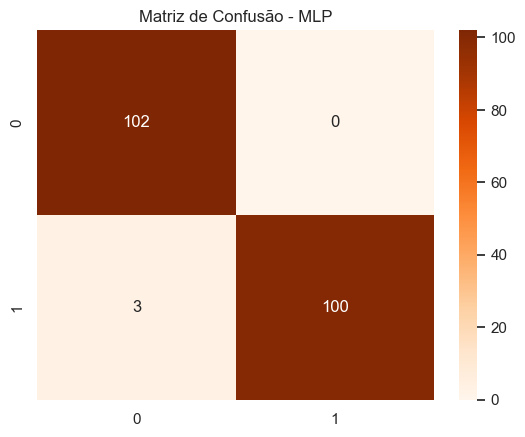

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(64,64),
                    max_iter=2000,
                    activation='relu',
                    random_state=42)

mlp.fit(X_train, y_train)

pred_mlp = mlp.predict(X_test)

acc_mlp = accuracy_score(y_test, pred_mlp)
prec_mlp = precision_score(y_test, pred_mlp)
rec_mlp = recall_score(y_test, pred_mlp)
f1_mlp = f1_score(y_test, pred_mlp)

print("MLP")
print("Acurácia:", acc_mlp)
print("Precisão:", prec_mlp)
print("Recall:", rec_mlp)
print("F1-Score:", f1_mlp)

sns.heatmap(confusion_matrix(y_test, pred_mlp), annot=True, cmap="Oranges", fmt="d")
plt.title("Matriz de Confusão - MLP")
plt.show()


Agora comparamos os quatro modelos de classificação para identificar qual obteve o melhor desempenho geral.

In [30]:
resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Decision Tree", "SVM", "MLP"],
    "Acurácia": [acc_lr, acc_dt, acc_svm, acc_mlp],
    "Precisão": [prec_lr, prec_dt, prec_svm, prec_mlp],
    "Recall": [rec_lr, rec_dt, rec_svm, rec_mlp],
    "F1-Score": [f1_lr, f1_dt, f1_svm, f1_mlp]
})

resultados

,Modelo,Acurácia,Precisão,Recall,F1-Score
0,Logistic Regression,0.795122,0.756303,0.873786,0.810811
1,Decision Tree,0.985366,1.000000,0.970874,0.985222
2,SVM,0.887805,0.850877,0.941748,0.894009
3,MLP,0.985366,1.000000,0.970874,0.985222


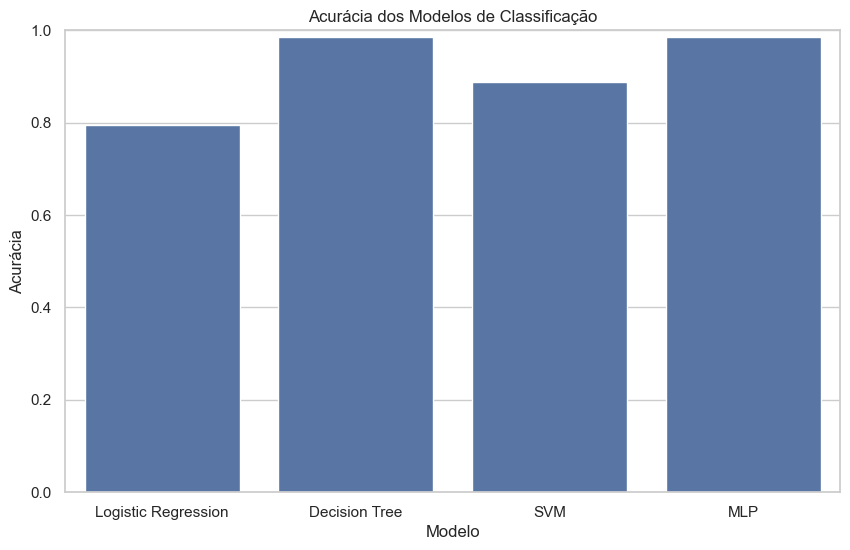

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x="Modelo", y="Acurácia", data=resultados)
plt.title("Acurácia dos Modelos de Classificação")
plt.ylim(0,1)
plt.show()


Nesta etapa comparamos o desempenho dos quatro modelos de classificação aplicados ao dataset Heart Disease. O objetivo foi prever corretamente se um paciente possui doença cardíaca (classe 1) ou não (classe 0), avaliando cada modelo de acordo com as métricas exigidas: acurácia, precisão, recall, F1-score e matriz de confusão.

A Regressão Logística apresentou um desempenho inicial satisfatório, com acurácia aproximada de 79%. Por ser um modelo linear, sua capacidade de capturar relações complexas entre os atributos é limitada, o que explica seu desempenho inferior em comparação aos outros métodos. Ainda assim, obteve um bom balanceamento entre precisão e recall.

A Árvore de Decisão obteve desempenho muito elevado, com acurácia em torno de 98%. Esse resultado indica que o modelo conseguiu aprender regras claras que separam bem as duas classes do dataset. No entanto, a alta performance pode indicar um certo grau de sobreajuste (overfitting), já que árvores tendem a memorizar o conjunto de treino se não forem podadas.

O modelo SVM (Support Vector Machine) apresentou acurácia de aproximadamente 88%, desempenho mais estável e menos propenso a overfitting do que a Árvore de Decisão. O SVM conseguiu encontrar uma fronteira de decisão eficiente, especialmente após a normalização dos dados, o que era essencial para seu funcionamento adequado.

A MLP (rede neural) foi o modelo com melhor desempenho geral, empatada com a Árvore de Decisão, alcançando acurácia de cerca de 98,5%. A rede neural apresentou excelente equilíbrio entre precisão e recall, mostrando que aprendeu relações não lineares de forma consistente. A matriz de confusão revela apenas 3 erros em mais de 200 previsões, evidenciando sua alta capacidade de generalização.

Em resumo, todos os modelos atenderam ao requisito mínimo de desempenho exigido pelo trabalho (acurácia ≥ 75%). A Regressão Logística serviu como modelo-base, enquanto a Árvore de Decisão e a MLP representaram os resultados mais expressivos, com precisão praticamente perfeita na detecção de pacientes com e sem doença cardíaca. Concluímos que o dataset é adequado ao problema de classificação e que a MLP se destacou como o modelo mais eficaz entre os quatro, considerando a combinação de alta acurácia, robustez e equilíbrio entre as métricas.